In [97]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
df = pd.read_csv('ppp_clean.csv')

In [3]:
del df['Unnamed: 0']

In [16]:
# Drop rows where Address is NaN

#ind = df[df['Address'].isnull()].index
#df = df.drop(ind)

In [24]:
# Drop rows where State is listed as XX

#ind1 = df[df['State']== 'XX'].index
#df = df.drop(ind1)

In [30]:
df

,LoanRange,BusinessName,Address,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsRetained,DateApproved,Lender,CD
0,7.50,"ARCTIC SLOPE NATIVE ASSOCIATION, LTD.",7000 Uula St,BARROW,AK,99723.0,813920.0,Non-Profit Organization,Unanswered,Unanswered,Unanswered,Y,295.0,04/14/2020,"National Cooperative Bank, National Association",AK - 00
1,7.50,CRUZ CONSTRUCTION INC,7000 East Palmer Wasilla Hwy,PALMER,AK,99645.0,238190.0,Subchapter S Corporation,Unanswered,Unanswered,Unanswered,NaN,215.0,04/15/2020,First National Bank Alaska,AK - 00
2,7.50,"I. C. E. SERVICES, INC",2606 C Street,ANCHORAGE,AK,99503.0,722310.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,367.0,04/11/2020,KeyBank National Association,AK - 00
3,7.50,KATMAI HEALTH SERVICES LLC,"11001 O'MALLEY CENTRE DRIVE, SUITE 204",ANCHORAGE,AK,99515.0,621111.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,0.0,04/29/2020,Truist Bank d/b/a Branch Banking & Trust Co,AK - 00
4,7.50,MATANUSKA TELEPHONE ASSOCIATION,1740 S. CHUGACH ST,PALMER,AK,99645.0,517311.0,Cooperative,Unanswered,Unanswered,Unanswered,NaN,267.0,06/10/2020,CoBank ACB,AK - 00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661195,0.25,YMCA OF NATRONA COUNTY,1161 Casper Mountain Road,CASPER,WY,82601.0,624190.0,Non-Profit Organization,Unanswered,Unanswered,Unanswered,Y,70.0,04/16/2020,First Interstate Bank,WY - 00
661196,0.25,YOR RESTAURANT GROUP,72 South Glenwood Street,JACKSON,WY,83001.0,722511.0,Subchapter S Corporation,Unanswered,Male Owned,Unanswered,NaN,15.0,05/19/2020,Celtic Bank Corporation,WY - 00
661197,0.25,"YOUTH CRISIS CENTER, INC.",1656 E 12th Street,CASPER,WY,82601.0,624190.0,Non-Profit Organization,Unanswered,Unanswered,Unanswered,Y,19.0,04/10/2020,First Interstate Bank,WY - 00
661198,0.25,"ZOCO UNLIMITED, INC.",PO BOX 305 3 CR 700,BAGGS,WY,82321.0,213112.0,Subchapter S Corporation,Unanswered,Male Owned,Unanswered,NaN,19.0,04/27/2020,Bank of Commerce,WY - 00


In [33]:
df = df.loc[:,('LoanRange', 'State', 'JobsRetained')]

In [45]:
df = df.groupby('State').sum()

In [53]:
# Sort States by ascending cumulative loans and jobs retained

df = df.sort_values(by= ['LoanRange', 'JobsRetained'], ascending=True)

In [54]:
# Define the top 5 states that received most loans and retained most jobs, for annotation in plot

head = df.tail(5)

In [107]:
df['LoanRange'] = df['LoanRange'].astype(int)
df['JobsRetained'] = df['JobsRetained'].astype(int)

In [109]:
x = df['LoanRange']
y = df['JobsRetained']

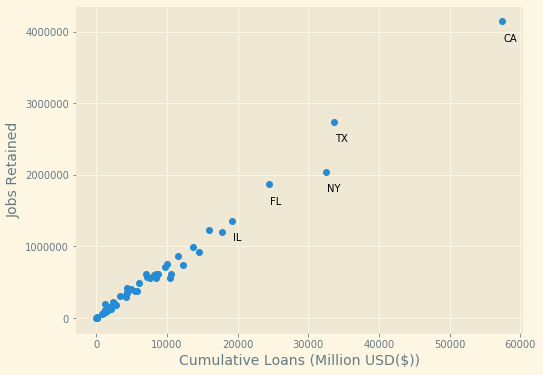

In [143]:
with plt.style.context('Solarize_Light2'):
    plt.figure(figsize=(8,6))
    plt.scatter(x, y)
    plt.ylabel('Jobs Retained', fontsize=14)
    plt.xlabel('Cumulative Loans (Million USD($))', fontsize=14)
    
    def ann(row):
        ind = row[0]     # this is the index (used as the label for head(5))
        r = row[1]        
        plt.annotate(ind, xy=(r["LoanRange"], r["JobsRetained"]), xytext=(1,-20) , textcoords ="offset points", )
        
    for row in head.iterrows():
        ann(row)


## Now look at Loans to Business type

In [238]:
df1 = pd.read_csv('ppp_clean.csv')

In [239]:
del df1['Unnamed: 0']

In [240]:
df1['BusinessType'].unique()

array(['Non-Profit Organization', 'Subchapter S Corporation',
       'Corporation', 'Limited  Liability Company(LLC)', 'Cooperative',
       nan, 'Partnership', 'Professional Association',
       'Sole Proprietorship', 'Employee Stock Ownership Plan(ESOP)',
       'Trust', 'Limited Liability Partnership', 'Joint Venture',
       'Non-Profit Childcare Center', 'Independent Contractors',
       'Self-Employed Individuals', 'Tenant in Common',
       'Rollover as Business Start-Ups (ROB'], dtype=object)

In [241]:
df1 = df1.loc[:,('JobsRetained', 'State', 'BusinessType')]

In [242]:
busi_type = df1.pivot_table(values= 'JobsRetained',
               index= 'BusinessType',
               columns= 'State',
               aggfunc= np.sum)

In [243]:
busi_type = busi_type.T

In [246]:
busi_type.sort_values(by= ['Limited  Liability Company(LLC)'], ascending=False).head(10)

BusinessType,Cooperative,Corporation,Employee Stock Ownership Plan(ESOP),Independent Contractors,Joint Venture,Limited Liability Company(LLC),Limited Liability Partnership,Non-Profit Childcare Center,Non-Profit Organization,Partnership,Professional Association,Rollover as Business Start-Ups (ROB,Self-Employed Individuals,Sole Proprietorship,Subchapter S Corporation,Tenant in Common,Trust
State,,,,,,,,,,,,,,,,,
TX,5699.0,916929.0,3261.0,491.0,1292.0,906660.0,100268.0,1196.0,192610.0,178161.0,24240.0,NaN,2921.0,29282.0,374618.0,0.0,805.0
CA,8121.0,2057739.0,4753.0,1135.0,202.0,678842.0,56316.0,2953.0,323797.0,96284.0,15755.0,19.0,5489.0,98222.0,782476.0,49.0,3136.0
FL,3022.0,711185.0,807.0,103.0,77.0,580266.0,17588.0,2282.0,138212.0,28734.0,17506.0,90.0,1108.0,13151.0,347124.0,26.0,372.0
NY,5334.0,728074.0,1208.0,106.0,507.0,511134.0,30543.0,4228.0,269907.0,38733.0,12881.0,NaN,901.0,15453.0,417092.0,48.0,599.0
IL,3381.0,516141.0,2993.0,110.0,95.0,319161.0,7926.0,1316.0,141175.0,15634.0,4003.0,NaN,133.0,6584.0,325773.0,153.0,1141.0
OH,2254.0,434071.0,4056.0,90.0,72.0,305087.0,9263.0,1424.0,126140.0,13874.0,3622.0,NaN,45.0,4991.0,308007.0,NaN,266.0
NJ,1269.0,359753.0,456.0,226.0,NaN,277161.0,7681.0,1117.0,74562.0,11904.0,6240.0,NaN,221.0,4971.0,178695.0,NaN,125.0
GA,2370.0,359076.0,331.0,421.0,211.0,267113.0,7594.0,444.0,67545.0,10323.0,3498.0,NaN,511.0,6944.0,137155.0,NaN,103.0
PA,2241.0,441874.0,1127.0,225.0,0.0,238120.0,16310.0,2259.0,145903.0,32501.0,5422.0,NaN,378.0,12131.0,296840.0,NaN,360.0


In [247]:
busi_type1 = busi_type.unstack().reset_index()

In [248]:
busi_type2 = busi_type1.groupby(['BusinessType', 'State']).sum().unstack()

In [249]:
busi_type2[(0,'FL')]

BusinessType
Cooperative                              3022.0
Corporation                            711185.0
Employee Stock Ownership Plan(ESOP)       807.0
Independent Contractors                   103.0
Joint Venture                              77.0
Limited  Liability Company(LLC)        580266.0
Limited Liability Partnership           17588.0
Non-Profit Childcare Center              2282.0
Non-Profit Organization                138212.0
Partnership                             28734.0
Professional Association                17506.0
Rollover as Business Start-Ups (ROB        90.0
Self-Employed Individuals                1108.0
Sole Proprietorship                     13151.0
Subchapter S Corporation               347124.0
Tenant in Common                           26.0
Trust                                     372.0
Name: (0, FL), dtype: float64

In [250]:
busi_type2[(0,'CA')]

BusinessType
Cooperative                               8121.0
Corporation                            2057739.0
Employee Stock Ownership Plan(ESOP)       4753.0
Independent Contractors                   1135.0
Joint Venture                              202.0
Limited  Liability Company(LLC)         678842.0
Limited Liability Partnership            56316.0
Non-Profit Childcare Center               2953.0
Non-Profit Organization                 323797.0
Partnership                              96284.0
Professional Association                 15755.0
Rollover as Business Start-Ups (ROB         19.0
Self-Employed Individuals                 5489.0
Sole Proprietorship                      98222.0
Subchapter S Corporation                782476.0
Tenant in Common                            49.0
Trust                                     3136.0
Name: (0, CA), dtype: float64

In [251]:
busi_type2[(0,'TX')]

BusinessType
Cooperative                              5699.0
Corporation                            916929.0
Employee Stock Ownership Plan(ESOP)      3261.0
Independent Contractors                   491.0
Joint Venture                            1292.0
Limited  Liability Company(LLC)        906660.0
Limited Liability Partnership          100268.0
Non-Profit Childcare Center              1196.0
Non-Profit Organization                192610.0
Partnership                            178161.0
Professional Association                24240.0
Rollover as Business Start-Ups (ROB         0.0
Self-Employed Individuals                2921.0
Sole Proprietorship                     29282.0
Subchapter S Corporation               374618.0
Tenant in Common                            0.0
Trust                                     805.0
Name: (0, TX), dtype: float64

In [252]:
busi_type2[(0,'NY')]

BusinessType
Cooperative                              5334.0
Corporation                            728074.0
Employee Stock Ownership Plan(ESOP)      1208.0
Independent Contractors                   106.0
Joint Venture                             507.0
Limited  Liability Company(LLC)        511134.0
Limited Liability Partnership           30543.0
Non-Profit Childcare Center              4228.0
Non-Profit Organization                269907.0
Partnership                             38733.0
Professional Association                12881.0
Rollover as Business Start-Ups (ROB         0.0
Self-Employed Individuals                 901.0
Sole Proprietorship                     15453.0
Subchapter S Corporation               417092.0
Tenant in Common                           48.0
Trust                                     599.0
Name: (0, NY), dtype: float64